In [2]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras

%matplotlib inline

Using TensorFlow backend.


In [1]:
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, Flatten, BatchNormalization,Input
from tensorflow.python.keras.layers import Dense, Conv2D, Conv3D, Flatten, BatchNormalization,Input
from tensorflow.python.keras import Sequential


depth = 10
filters = 64
channels = 3
model = Sequential()
#Adding layers

model.add(Conv3D(filters ,kernel_size=(3,3,channels), activation='relu',padding = 'same', input_shape = (3,256,150,1)))

for i in range(depth-2):
    model.add(Conv3D(filters, kernel_size=(3,3,64), activation='relu',padding = 'same'))
    model.add(BatchNormalization())
    
model.add(Conv3D(1, kernel_size=(3,3,64), padding = 'same'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 3, 256, 150, 64)   1792      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 256, 150, 64)   256       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 256, 150, 64)   256       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 256, 150, 64)   2

In [0]:
'''
import nibabel as nib
import matplotlib.pyplot as plt
img = nib.load('IXI060-Guys-0709-IXI3DMPRAG_-s234_-0301-00003-000001-01.nii')
epi = img.get_fdata()
slice_A = epi[200,:,:]
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
plt.show()
'''

'\nimport nibabel as nib\nimport matplotlib.pyplot as plt\nimg = nib.load(\'IXI060-Guys-0709-IXI3DMPRAG_-s234_-0301-00003-000001-01.nii\')\nepi = img.get_fdata()\nslice_A = epi[200,:,:]\nfig, ax = plt.subplots()\nax.imshow(slice_A, cmap="gray")\nplt.show()\n'

In [0]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [0]:
#slice_A_with_noise = add_rician_noise_to_img(0.15,slice_A)
#slice_A_with_noise.dtype

dtype('float64')

In [0]:
#slice_A_with_noise

array([[0.11883172, 0.23307491, 0.14087471, ..., 0.03155136, 0.22600725,
        0.02775825],
       [0.27675927, 0.35307442, 0.10328609, ..., 0.32540719, 0.20867756,
        0.05926299],
       [0.15133714, 0.32935519, 0.4591279 , ..., 0.26371642, 0.07854934,
        0.03692822],
       ...,
       [0.0574409 , 0.51233359, 0.25781021, ..., 0.11240616, 0.16861795,
        0.0910877 ],
       [0.1611491 , 0.19597431, 0.15555928, ..., 0.42272576, 0.2149068 ,
        0.32535748],
       [0.08803028, 0.07919629, 0.15167038, ..., 0.1228979 , 0.14657047,
        0.09224742]])

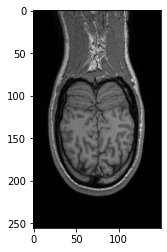

In [0]:
#fig, ax = plt.subplots()
#ax.imshow(slice_A_with_noise, cmap="gray")
#plt.show()

In [0]:
#residual_noise = slice_A_with_noise - slice_A

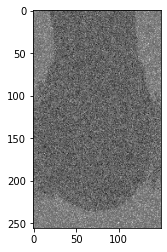

In [0]:
#fig, ax = plt.subplots()
#ax.imshow(residual_noise, cmap="gray")
#plt.show()

In [8]:
!unzip /content/img_with_noise_3slices_15.zip

Archive:  /content/img_with_noise_3slices_15.zip
   creating: img_with_noise_3slices_15/
  inflating: img_with_noise_3slices_15/test1.nii  
  inflating: img_with_noise_3slices_15/test17.nii  
  inflating: img_with_noise_3slices_15/test2.nii  
  inflating: img_with_noise_3slices_15/test4.nii  
  inflating: img_with_noise_3slices_15/test3.nii  
  inflating: img_with_noise_3slices_15/test5.nii  
  inflating: img_with_noise_3slices_15/test6.nii  
  inflating: img_with_noise_3slices_15/test7.nii  
  inflating: img_with_noise_3slices_15/test30.nii  
  inflating: img_with_noise_3slices_15/test8.nii  
  inflating: img_with_noise_3slices_15/test9.nii  
  inflating: img_with_noise_3slices_15/test10.nii  
  inflating: img_with_noise_3slices_15/test11.nii  
  inflating: img_with_noise_3slices_15/test12.nii  
  inflating: img_with_noise_3slices_15/test13.nii  
  inflating: img_with_noise_3slices_15/test14.nii  
  inflating: img_with_noise_3slices_15/test15.nii  
  inflating: img_with_noise_3slices_

In [9]:
!unzip /content/nusta_noise_3slices_15.zip

Archive:  /content/nusta_noise_3slices_15.zip
   creating: nusta_noise_3slices_15/
  inflating: nusta_noise_3slices_15/test7.nii  
  inflating: nusta_noise_3slices_15/test2.nii  
  inflating: nusta_noise_3slices_15/test26.nii  
  inflating: nusta_noise_3slices_15/test1.nii  
  inflating: nusta_noise_3slices_15/test39.nii  
  inflating: nusta_noise_3slices_15/test27.nii  
  inflating: nusta_noise_3slices_15/test3.nii  
  inflating: nusta_noise_3slices_15/test4.nii  
  inflating: nusta_noise_3slices_15/test5.nii  
  inflating: nusta_noise_3slices_15/test6.nii  
  inflating: nusta_noise_3slices_15/test8.nii  
  inflating: nusta_noise_3slices_15/test9.nii  
  inflating: nusta_noise_3slices_15/test10.nii  
  inflating: nusta_noise_3slices_15/test11.nii  
  inflating: nusta_noise_3slices_15/test12.nii  
  inflating: nusta_noise_3slices_15/test13.nii  
  inflating: nusta_noise_3slices_15/test14.nii  
  inflating: nusta_noise_3slices_15/test15.nii  
  inflating: nusta_noise_3slices_15/test16.n

In [0]:
from keras import backend as K
def l2_loss(y_pred,y_true):
    return K.sum((K.square(y_true - y_pred)))

In [11]:
import os
print(os.getcwd())
os.chdir('/content/nusta_noise_3slices_15')

/content


In [0]:
f_name = np.loadtxt('/content/nusta_noise_3slices_15/test7.nii',delimiter=',')

In [0]:
b = f_name.reshape(3,256,150)

In [14]:
f_name.size

115200

In [0]:
import numpy as np
import glob
Y_train = np.zeros((47,3,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("/content/nusta_noise_3slices_15/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.size == 115200:
        b = b.reshape(3,256,150)
        Y_train[i] = b
        i = i + 1

In [16]:
i

42

In [0]:
Y_train = Y_train[:42,:,:]

In [18]:
Y_train.shape

(42, 3, 256, 150)

In [0]:
import os
os.chdir('/content/img_with_noise_3slices_15')

In [0]:
import numpy as np
import glob
X_train = np.zeros((47,3,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("/content/img_with_noise_3slices_15/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.size == 115200:
        b = b.reshape(3,256,150)
        X_train[i] = b
        i = i + 1     

In [21]:
i

42

In [22]:
X_train = X_train[:42,:,:,:]
X_train.shape

(42, 3, 256, 150)

In [23]:
X_train.shape[1:]

(3, 256, 150)

In [0]:
import os
os.chdir('/content/')

In [0]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.8, clipnorm=1.0 ,clipvalue =0.5)
model.compile(optimizer = SGD(lr=0.001, momentum=0.8, clipnorm=1.0 ,clipvalue =0.5), loss= l2_loss)

In [26]:
model.fit(X_train[:20,:,:,:].reshape(-1,3,256,150,1),Y_train[:20,:,:,:].reshape(-1,3,256,150,1),epochs=50 ,batch_size=5)

Epoch 1/50
4/4 [==============================] - 64s 16s/step - loss: 764928.0000
Epoch 2/50
4/4 [==============================] - 64s 16s/step - loss: 508072.2500
Epoch 3/50
4/4 [==============================] - 64s 16s/step - loss: 314512.6875
Epoch 4/50
4/4 [==============================] - 64s 16s/step - loss: 177411.1562
Epoch 5/50
4/4 [==============================] - 64s 16s/step - loss: 92502.2344
Epoch 6/50
4/4 [==============================] - 64s 16s/step - loss: 56668.0234
Epoch 7/50
4/4 [==============================] - 64s 16s/step - loss: 40465.1211
Epoch 8/50
4/4 [==============================] - 64s 16s/step - loss: 35172.8516
Epoch 9/50
4/4 [==============================] - 64s 16s/step - loss: 27661.3828
Epoch 10/50
4/4 [==============================] - 64s 16s/step - loss: 27013.8027
Epoch 11/50
4/4 [==============================] - 64s 16s/step - loss: 23488.1445
Epoch 12/50
4/4 [==============================] - 64s 16s/step - loss: 20785.6680
Epoch 13/

In [0]:
model.save('model_with_noise_15.h5')

In [0]:
#resi = model.predict(np.array(slice_A_with_noise).reshape(-1,256,150,3,1))
#resi.shape

(1, 256, 150, 1)

In [0]:
#PSNR CALCULATION

import numpy as np
from math import log10, sqrt 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    #print("mse:",mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.Therefore PSNR have no importance. 
                  
        return 100
    psnr_noisy = 20 * log10(255.0 / sqrt(mse)) 
    #print('PSNR of reconstructed validation images: {psnr}dB'.format(psnr=np.round(psnr_noisy,2)))
    return np.round(psnr_noisy,2)

In [0]:
noise_inserted = 0
noise_removed = 0

In [30]:
PSNR(res1,slice_A_with_noise)

NameError: ignored

In [31]:
test_img = X_train - Y_train
test_img.shape

(42, 3, 256, 150)

In [0]:
nins = 0
nrem = 0
for i in range(21,30):
  nins = PSNR(test_img[i],X_train[i])
  resi = model.predict(np.array(X_train[i]).reshape(-1,3,256,150,1))
  resi = resi.reshape(3,256,150)
  nrem = PSNR(X_train[i]-resi,X_train[i])
  noise_inserted = noise_inserted + nins
  noise_removed = noise_removed + nrem
  

In [0]:
noise_inserted = noise_inserted/(30-21)
noise_removed = noise_removed/(30-21)

In [56]:
print(noise_inserted)
print(noise_removed)

63.663333333333334
66.36888888888889


In [44]:
PSNR(test_img[41],X_train[41])
resi = model.predict(np.array(X_train[41]).reshape(-1,3,256,150,1))
print(resi.shape)
resi = resi.reshape(3,256,150)
PSNR(X_train[41]-resi,X_train[41])

PSNR of reconstructed validation images: 64.02dB
(1, 3, 256, 150, 1)
PSNR of reconstructed validation images: 66.15dB


In [53]:
PSNR(X_train[41]-Y_train[41],X_train[41])

64.02